In [1]:
import ipywidgets as widgets
import opendrift
from opendrift.models.oceandrift import OceanDrift
from opendrift.models.leeway import Leeway
from opendrift.models.openoil import OpenOil
from opendrift.models.shipdrift import ShipDrift

from datetime import datetime


# Interactive OpenDrift

This is an example of a GUI for running OpenDrift in Jupyter Notebooks.

In [2]:
model = widgets.Dropdown(
    value=Leeway,
    placeholder='Model type',
    options=[('Leeway (SAR)', Leeway), ('OpenOil', OpenOil), ('ShipDrift', ShipDrift)],
    description='OpenDrift model:',
    ensure_option=True,
    disabled=False
)
display(model)

Dropdown(description='OpenDrift model:', options=(('Leeway (SAR)', <class 'opendrift.models.leeway.Leeway'>), …

Select starting point for the simulation:

In [3]:
lon = widgets.FloatText(
    value=4.5,
    description='Longitude:',
    disabled=False
)
lat = widgets.FloatText(
    value=60.1,
    description='Latitude:',
    disabled=False
)
display(lon, lat)

FloatText(value=4.5, description='Longitude:')

FloatText(value=60.1, description='Latitude:')

## Run the simulation!

In [8]:
od = None

# TODO: https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html#interacting-with-output-widgets-from-background-threads
output = widgets.Output()

def run_simulation(b):
    global od
    with output:
        print('Running simulation...')
        od = model.value()
        
        od.add_readers_from_list([
            "https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be",
            "https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc",
            "https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_zdepth_be"])
        
        
        od.seed_elements(lon=lon.value, lat=lat.value, time=datetime.now(), number=10000, radius=1000)
        od.run(steps=6, time_step=3600)
        print(f'Simulation run complete for model: {od.__class__.__name__}')
        print(od)

go = widgets.Button(
    description='Peis pao!',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do it!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
go.on_click(run_simulation)

display(go, output)

Button(description='Peis pao!', icon='check', style=ButtonStyle(), tooltip='Do it!')

Output()

In [6]:
print(od)

--------------------
Reader performance:
--------------------
global_landmask
 0:00:01.1  total
 0:00:00.0  preparing
 0:00:01.0  reading
 0:00:00.0  masking
--------------------
Performance:
   45.1 total time
    2.5 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
   42.5 main loop
      0.8 updating elements
    0.0 cleaning up
--------------------
Model:	Leeway     (OpenDrift version 1.14.6)
	0 active LeewayObj particles  (10000 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind

Discarded readers:
  https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be (ends before simuation is finished)
  https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest

10:09:32 DEBUG   opendrift:2429: Setting up map: corners=None, fast=False, lscale=None
10:09:32 DEBUG   opendrift.readers.reader_global_landmask:84: Loading shapes ('i' level 1) with Cartopy shapereader...
10:09:34 DEBUG   opendrift.readers.reader_global_landmask:84: Loading shapes ('i' level 5) with Cartopy shapereader...
10:09:34 DEBUG   opendrift.readers.reader_global_landmask:84: Loading shapes ('i' level 6) with Cartopy shapereader...
10:09:34 DEBUG   opendrift.readers.reader_global_landmask:123: Adding GSHHG shapes from cartopy, scale: i, extent: (2.1117225646972657, 5.641124153137207, 59.741276550292966, 63.035220336914044)..
10:10:10 DEBUG   opendrift.readers.reader_global_landmask:123: Adding GSHHG shapes from cartopy, scale: i, extent: (2.1117225646972657, 5.641124153137207, 59.741276550292966, 63.035220336914044)..
10:10:17 DEBUG   opendrift.readers.reader_global_landmask:123: Adding GSHHG shapes from cartopy, scale: i, extent: (2.1117225646972657, 5.641124153137207, 59.7412

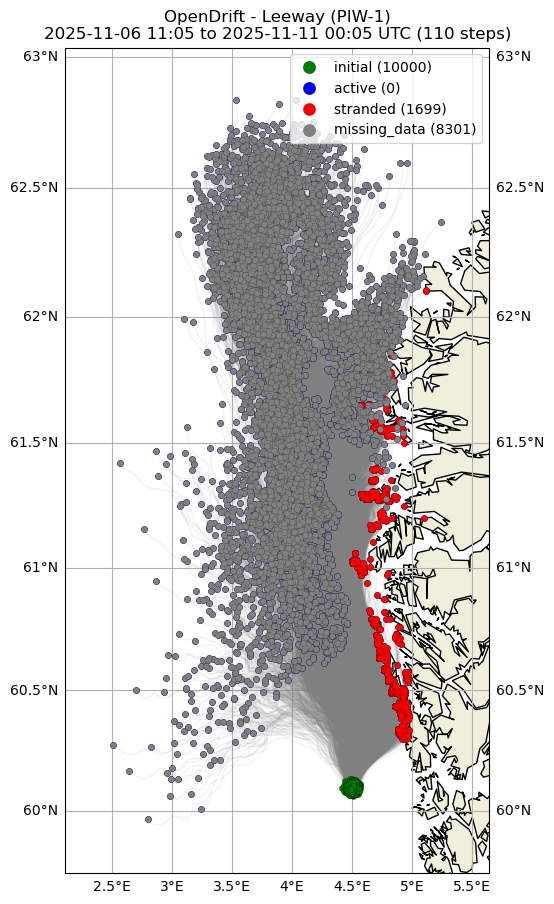

(<GeoAxes: title={'center': 'OpenDrift - Leeway (PIW-1)\n2025-11-06 11:05 to 2025-11-11 00:05 UTC (110 steps)'}>,
 <Figure size 564.413x1100 with 1 Axes>)

In [7]:
od.plot()